<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/wip/EA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt


In [216]:
# Algorithm 1 Generate a random TSP instance.
def randomInstance(size):

  instance = []
  
  for i in range(size):
    instance.append((random.uniform(0, 1),random.uniform(0, 1)))

  return instance

In [217]:
# Algorithm 3 Compute Fitness
def ComputeFitness(population):

  fitnessResults = {}

  def routeDistance(route):

    pathDistance = 0

    for i in range(len(route)):
      fromCity = route[i]
      toCity = None
      if i + 1 < len(route):
        toCity = route[i + 1]
      else:
        toCity = route[0]

      pathDistance += np.linalg.norm(np.array(fromCity) - np.array(toCity))

    return pathDistance

  for i in range(0,len(population)):
    fitnessResults[i] = 1/routeDistance(population[i])

  return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)



In [218]:
# Algorithm 2 EA for evolving problem easy and hard TSP instances
def EA(popSize, instSize, generations, mutationRate):

  poolSize = popSize/2
  cityList = randomInstance(instSize)

  population = [] #first generation
  for i in range(popSize):
    population.append(random.sample(cityList, len(cityList))) # randomly select the order in which we visit each city.

  popRanked = ComputeFitness(population)
  print("Initial distance: " + str(popRanked[0][1]))
  
  for i in range(generations):
    popRanked = ComputeFitness(population)
    matingpool = createMatingPool(poolSize, population, popRanked)
    offspring = breedPopulation(matingpool)
    population = mutatePopulation(offspring, mutationRate)
  
  print("Final distance: " + str(popRanked[0][1]))
  bestRoute = population[popRanked[0][0]]

  return bestRoute

  # poolSize ← ?popSize/2? 
  # for i = 1 → popSize do 
  #   population[i] ← rescale(randomInstance(instSize)) 
  #   population[i] ← round(population[i], cells) 
  #   if rnd then 
  #   population[i] ← normalMutation(population[i]) 
  #   population[i] ← CutToBoundary(population[i])

  # for generation = 1 → generations do 
  #   for k = 1 → popSize do 
  #   fitness[k] ← computeFitness(population[k], repetitions)

  # matingPool ← createMatingPool(poolSize, population, fitness) 
  # nextPopulation[1] ← population[bestOf(fitness)] ? 1-elitism

  #   for k = 2 → popSize do 
  #   parent1 ← randomElement(matingPool) 
  #   parent2 ← randomElement(matingPool) 
  #   offspring ← uniformMutation(uniformCrossover(parent1, parent2)) # uniformMutation
  #   if !rnd then 
  #     offspring ← normalMutation(offspring)
  #   offspring ← rescale(offspring) 
  #   offspring ← round(offspring, cells) 
  #   if rnd then 
  #   offspring ← normalMutation(offspring) 
  #   offspring ← CutToBoundary(offspring)

  # population ← nextPopulation 
  # if over time limit time_limit then 
  # return population

In [219]:
# Algorithm 4 Mating pool creation

def createMatingPool(poolSize, population, popRanked):
  
  matingPool = []
  
  matingPool.append(population[popRanked[0][0]])

  for i in range(int(poolSize)):
    rnd_a = random.randint(0, poolSize)
    rnd_b = random.randint(0, poolSize)

    if popRanked[rnd_a][1] >= popRanked[rnd_b][1]:
      matingPool.append(population[popRanked[rnd_a][0]])
    else:
      matingPool.append(population[popRanked[rnd_b][0]])

  return matingPool

In [220]:
def ordered_crossover(parent1, parent2): # all locations exactly one time.
  child = []
  childP1 = []
  childP2 = []
  
  geneA = int(random.random() * len(parent1))
  geneB = int(random.random() * len(parent1))
  
  startGene = min(geneA, geneB)
  endGene = max(geneA, geneB)

  for i in range(startGene, endGene):
      childP1.append(parent1[i])
      
  childP2 = [item for item in parent2 if item not in childP1]

  child = childP1 + childP2
  return child

In [221]:
def breedPopulation(matingpool, eliteSize=1):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = ordered_crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)

    return children

In [222]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [223]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [224]:
EA(popSize=100, instSize=20, generations=500, mutationRate=0.01)

Initial distance: 0.12333298231389365
Final distance: 0.15959746729008778


[(0.3748701803929696, 0.621427970064747),
 (0.6688171196712024, 0.8796579391781575),
 (0.2835389773545006, 0.9958853360776779),
 (0.31260959749178063, 0.8879404723808584),
 (0.06335272802290282, 0.5303435704781543),
 (0.23894097229683287, 0.6638908238707422),
 (0.4116805273563444, 0.488000048469996),
 (0.5629430209083225, 0.4905804601633612),
 (0.03669134660502005, 0.5065153576223606),
 (0.15553754689771948, 0.2880547446370151),
 (0.3133529260198167, 0.10423215112506978),
 (0.36207651464741664, 0.4505546429051137),
 (0.5301719674587588, 0.4430334983609302),
 (0.2527914005608525, 0.45034044395533424),
 (0.11608172800457095, 0.026709711064678787),
 (0.4398453745069154, 0.13738223904766944),
 (0.8079522663798993, 0.017888820524786464),
 (0.9840655079273182, 0.22577009997551523),
 (0.904783824852883, 0.6555912098517033),
 (0.44356081228817856, 0.5146930746786087)]

Initial distance: 0.13156182539848582
Final distance: 0.19927315727235634


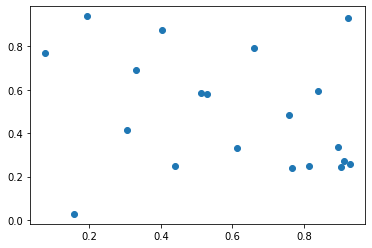

In [225]:

plt.scatter(*zip(*EA(popSize=100, instSize=20, generations=500, mutationRate=0.01)))

plt.show()